# KHÁM PHÁ DỮ LIỆU

Dữ liệu chứa trong file `tips.csv` chứa thông tin tiền tip của khách hàng tại một nhà hàng. Dữ liệu có các thông tin sau:

- `total_bill`: tổng hoá đơn (USD)
- `tip`: tiền tip/ tiền boa (USD)
- `sex`: giới tính người thanh toán hóa đơn
- `smoker`: có hút thuốc hay không
- `day`: ngày trong tuần
- `time`: thời gian dùng bữa(buổi sáng, buổi trưa, buổi tối)
- `size`: số lượng người tham gia

Bạn hãy thực hiện thống kê mô tả để tìm hiểu về hành vi tip của khách hàng tại nhà hàng

## HIỂU DỮ LIỆU

1. Đọc dữ liệu
2. Xoá cột `Unnamed: 0`
3. Cho biết dữ liệu có bao nhiêu dòng, bao nhiêu thuộc tính.
4. Trong các thuộc tính, thuộc tính nào là thuộc tính phân loại, thuộc tính nào là thuộc tính định lượng
5. Có bao nhiêu nam, bao nhiêu nữ. Tỷ lệ bao nhiêu?
6. Có bao nhiêu người hút thuốc. Tỷ lệ bao nhiêu?
7. Ngày nào trong tuần khách hàng hay đến dùng bữa nhất. Tỷ lệ bao nhiêu?
8. Nhà hàng phục vụ bữa ăn nào nhiều nhất (Breakfast, Lunch, Dinner)?
9. Nhóm khách hàng dùng bữa tại nhà hàng nhiều nhất là bao nhiêu người?
10. Trung bình trong một bữa ăn nhà hàng phục vụ mấy khách?

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu
fileName = 'tips.csv'
df = pd.read_csv(fileName)
# df.head(5)

# Xử lý dữ liệu
# df.info()
# df.describe()
# df.isna().sum() 

# Xoá cột Unnamed: 0
df_without_unnamed = df.drop(columns=['Unnamed: 0'])
df_without_unnamed

# Cho biết dữ liệu có bao nhiêu dòng, bao nhiêu thuộc tính.
df_without_unnamed.shape

# Trong các thuộc tính, thuộc tính nào là thuộc tính phân loại, thuộc tính nào là thuộc tính định lượng
categorical_columns = df_without_unnamed.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df_without_unnamed.select_dtypes(include=['number']).columns.tolist()
print("Thuộc tính định tính (phân loại):", categorical_columns)
print("Thuộc tính định lượng:", numerical_columns)

# Có bao nhiêu nam, bao nhiêu nữ. Tỷ lệ bao nhiêu?
male_count = df_without_unnamed[df_without_unnamed['sex'] == 'Male'].size
female_count = df_without_unnamed[df_without_unnamed['sex'] == 'Female'].size
sex_count = df_without_unnamed.size

male_ratio = round(male_count * 100 / sex_count, 2)
female_ratio = round(female_count * 100 / sex_count, 2)

print(f'Male Ratio: {male_ratio}%')
print(f'Female Ratio: {female_ratio}%')

# Có bao nhiêu người hút thuốc. Tỷ lệ bao nhiêu?
smoker_yes_count = df_without_unnamed[df_without_unnamed['smoker'] == 'Yes'].size
smoker_count = df_without_unnamed.size
smoker_yes_ratio = round(smoker_yes_count * 100 / smoker_count, 2)

print(f'Có {smoker_yes_count} người hút thuốc')
print(f'Có {smoker_yes_ratio}% tỷ lệ người hút thuốc')

# Ngày nào trong tuần khách hàng hay đến dùng bữa nhất. Tỷ lệ bao nhiêu?
day_counts = df_without_unnamed['day'].value_counts()
most_common_day = day_counts.idxmax()
most_common_day_ratio = round((day_counts.max() / smoker_count) * 100, 2)
print(f"Ngày khách đến nhiều nhất là {most_common_day}, chiếm {most_common_day_ratio}%")

# Nhà hàng phục vụ bữa ăn nào nhiều nhất (Breakfast, Lunch, Dinner)?
restaurants_count = df_without_unnamed['time'].value_counts()
restaurant_idxmax = restaurants_count.idxmax()
restaurant_max = restaurants_count.max()
restaurant_time = df_without_unnamed.shape[0]
restaurant_ratio = round(restaurant_max * 100 / restaurant_time, 2)
print(f'Nhà hàng phục vụ bữa ăn nào nhiều nhất vào {restaurant_idxmax} với tỉ lệ: {restaurant_ratio}%')

# Nhóm khách hàng dùng bữa tại nhà hàng nhiều nhất là bao nhiêu người?
size_count = df_without_unnamed['size'].value_counts()

size_idxmax = size_count.idxmax()
size_max = size_count.max()
size_total = df_without_unnamed.shape[0]
size_ratio = round(size_max * 100 / size_total, 2)

print(f'Nhóm khách hàng dùng bữa tại nhà hàng nhiều nhất là {size_max} với tỉ lệ: {size_ratio}')

# Trung bình trong một bữa ăn nhà hàng phục vụ mấy khách?
average_guests = df_without_unnamed['size'].mean()

print(f"Trung bình mỗi bữa ăn nhà hàng phục vụ {average_guests:.2f} khách.")

Thuộc tính định tính (phân loại): ['sex', 'smoker', 'day', 'time']
Thuộc tính định lượng: ['total_bill', 'tip', 'size']
Male Ratio: 64.34%
Female Ratio: 35.66%
Có 651 người hút thuốc
Có 38.11% tỷ lệ người hút thuốc
Ngày khách đến nhiều nhất là Sat, chiếm 5.09%
Nhà hàng phục vụ bữa ăn nào nhiều nhất vào Dinner với tỉ lệ: 72.13%
Nhóm khách hàng dùng bữa tại nhà hàng nhiều nhất là 156 với tỉ lệ: 63.93
Trung bình mỗi bữa ăn nhà hàng phục vụ 2.57 khách.


## YẾU TỐ ẢNH HƯỞNG ĐẾN TIỀN TIP

Trong phần này, chúng ta thử tìm hiểu về tiền tip tại nhà hàng và các yếu tố có thể ảnh hưởng đến nó

1. Tỷ lệ nhận được tiền tip của nhà hàng là bao nhiêu?
2. Tỷ lệ tiền tip trên tổng hóa đơn là bao nhiêu?
3. Giữa nam và nữ ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
4. Giữa người hút thuốc và người không hút thuốc ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
5. Thống kê tổng số tiền tip nhận được theo ngày.

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu
fileName = 'tips.csv'
df = pd.read_csv(fileName)
df.head(5)

# Tỷ lệ nhận được tiền tip của nhà hàng là bao nhiêu?
bills_with_tip = (df_without_unnamed['tip'] > 0).sum()
tip_ratio = round((bills_with_tip / len(df_without_unnamed)) * 100, 2)
print(f"Tỷ lệ hóa đơn có tiền tip: {tip_ratio}%")

# Tỷ lệ tiền tip trên tổng hóa đơn là bao nhiêu?
total_tip = df_without_unnamed['tip'].sum()
total_bill = df_without_unnamed['total_bill'].sum()
tip_percentage = round((total_tip / total_bill) * 100, 2)
print(f"Tỷ lệ tiền tip trên tổng hóa đơn: {tip_percentage}%")

# Giữa nam và nữ ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
male_tips_df = df_without_unnamed[df_without_unnamed['sex'] == 'Male']
female_tips_df = df_without_unnamed[df_without_unnamed['sex'] == 'Female']

male_count = male_tips_df.shape[0]
female_count = female_tips_df.shape[0]
sex_count = df_without_unnamed.shape[0]

print('Số lượng nam được tips: ', male_count)
print('Số lượng nữ được tips: ', female_count)
print(f'Giữa nam và nữ thì nam với {male_count} tip nhiều tiền hơn so với nữ là {female_count}, nam được tip thường xuyên hơn!')

# Giữa người hút thuốc và người không hút thuốc
# ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
smoker_tips_df = df_without_unnamed[df_without_unnamed['smoker'] == 'Yes']
nosmoker_tips_df = df_without_unnamed[df_without_unnamed['smoker'] == 'No']

smoker_count = smoker_tips_df.shape[0]
nosmoker_count = nosmoker_tips_df.shape[0]
total_count = df_without_unnamed.shape[0]

print('Số lượng người hút thuốc được tips: ', smoker_count)
print('Số lượng người không hút được tips: ', nosmoker_count)
print(f'Giữa người hút thuốc và người không hút thuốc thì người không hút thuốc với {nosmoker_count} tip nhiều tiền hơn so với người hút thuốc là {smoker_count}, người không hút thuốc được tip thường xuyên hơn!')

# Thống kê tổng số tiền tip nhận được theo ngày.
tip_by_day = df_without_unnamed.groupby('day')['tip'].sum().reset_index()

print(tip_by_day)

Tỷ lệ hóa đơn có tiền tip: 100.0%
Tỷ lệ tiền tip trên tổng hóa đơn: 15.15%
Số lượng nam được tips:  157
Số lượng nữ được tips:  87
Giữa nam và nữ thì nam với 157 tip nhiều tiền hơn so với nữ là 87, nam được tip thường xuyên hơn!
Số lượng người hút thuốc được tips:  93
Số lượng người không hút được tips:  151
Giữa người hút thuốc và người không hút thuốc thì người không hút thuốc với 151 tip nhiều tiền hơn so với người hút thuốc là 93, người không hút thuốc được tip thường xuyên hơn!
    day     tip
0   Fri   51.96
1   Sat  260.40
2   Sun  247.39
3  Thur  171.83


# TRỰC QUAN DỮ LIỆU

Để dễ hình dung, bạn hãy trực quan với một số câu hỏi sau đây:

1. Vẽ đồ thị thể hiện tổng tiền tip theo ngày
2. Vẽ đồ thị thể hiện tổng tiền tip theo bữa ăn (time)
3. Vẽ đồ thị histogram của tổng hoá đơn
4. Vẽ đồ thị boxplot của tổng hoá đơn
5. Vẽ đồ thị để kiểm tra sự liên quan giữa tổng hoá đơn và tiền tip.
6. So sánh số tiền mà khách hàng đã chi giữa các ngày trong tuần.

## Với Matplotlib

Bạn hãy trực quan với thư viện matplotlib

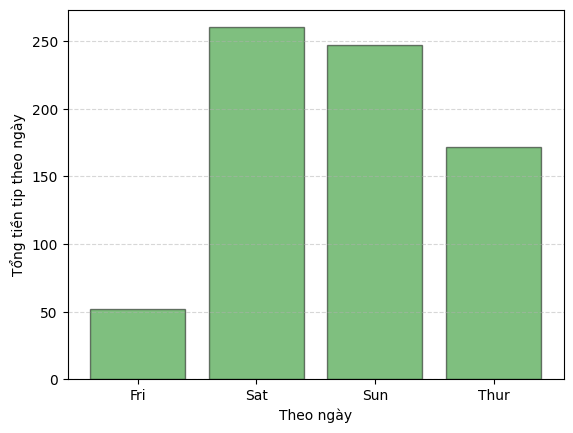

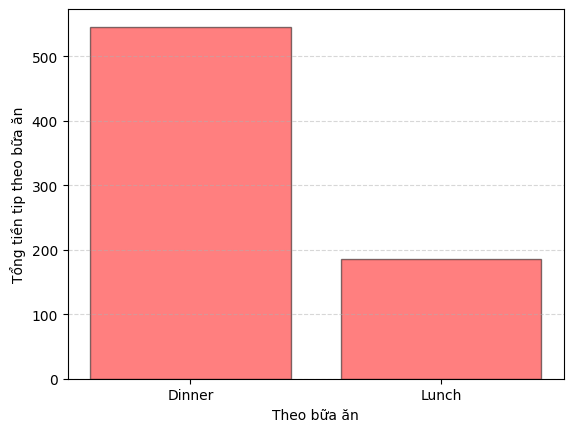

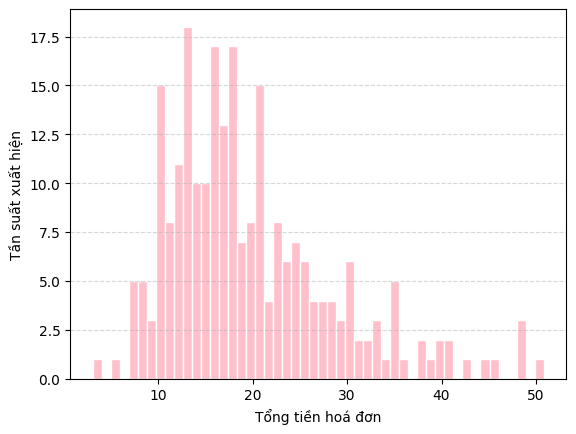

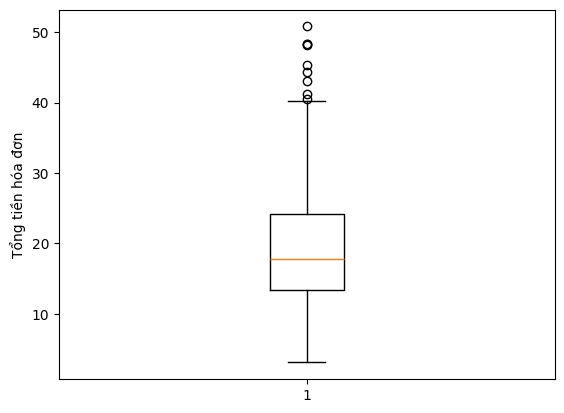

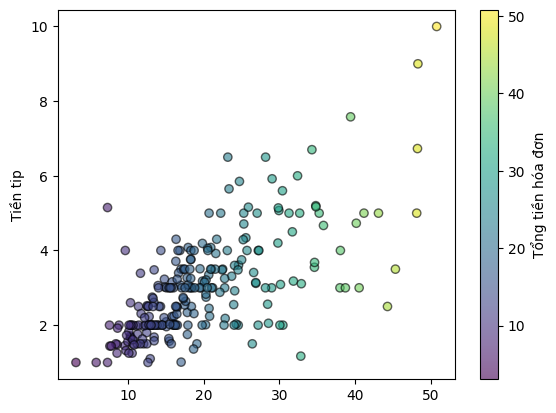

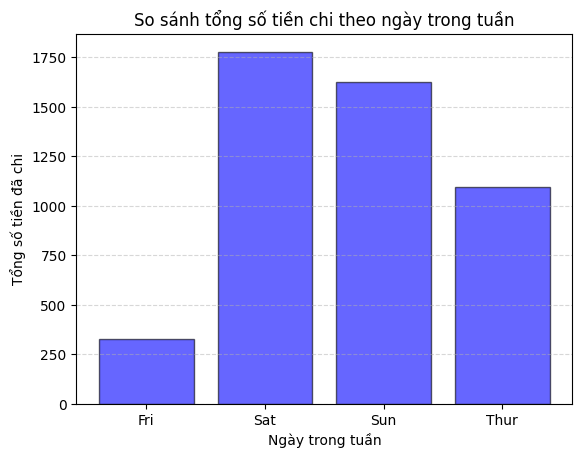

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('tips.csv')
df

# 1. Vẽ đồ thị thể hiện tổng tiền tip theo ngày
tip_by_day = df.groupby('day')['tip'].sum()
plt.bar(tip_by_day.index, tip_by_day.values, color='green', edgecolor='black', alpha=0.5)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.xlabel('Theo ngày')
plt.ylabel('Tổng tiền tip theo ngày')
plt.show()

# 2. Vẽ đồ thị thể hiện tổng tiền tip theo bữa ăn (time)
tip_by_time = df.groupby('time')['tip'].sum()
plt.bar(tip_by_time.index, tip_by_time.values, color='red', edgecolor='black', alpha=0.5)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.xlabel('Theo bữa ăn')
plt.ylabel('Tổng tiền tip theo bữa ăn')
plt.show()

# 3. Vẽ đồ thị histogram của tổng hoá đơn
total_bill_df = df['total_bill'].values
plt.hist(total_bill_df, color='pink', edgecolor='white', bins=50)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.ylabel('Tần suất xuất hiện')
plt.xlabel('Tổng tiền hoá đơn')
plt.show()

# 4. Vẽ đồ thị boxplot của tổng hoá đơn
plt.boxplot(total_bill_df)
plt.ylabel("Tổng tiền hóa đơn")
plt.show()

# 5. Vẽ đồ thị để kiểm tra sự liên quan giữa tổng hoá đơn và tiền tip.
total_bill_df= df['total_bill']
tip_df= df['tip']
plt.scatter(total_bill_df, tip_df, alpha=0.6, c=df['total_bill'], cmap='viridis', edgecolors='k')
# plt.scatter(total_bill_df, tip_df)
plt.ylabel("Tiền tip")
plt.colorbar(label="Tổng tiền hóa đơn")
plt.show()

# 6. So sánh số tiền mà khách hàng đã chi giữa các ngày trong tuần.
total_bill_by_day = df.groupby('day')['total_bill'].sum()

plt.bar(total_bill_by_day.index, total_bill_by_day.values, color='blue', edgecolor='black', alpha=0.6)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.xlabel('Ngày trong tuần')
plt.ylabel('Tổng số tiền đã chi')
plt.title('So sánh tổng số tiền chi theo ngày trong tuần')
plt.show()

## Với Seaborn

Bạn hãy tìm hiểu và trực quan với thư viện seaborn

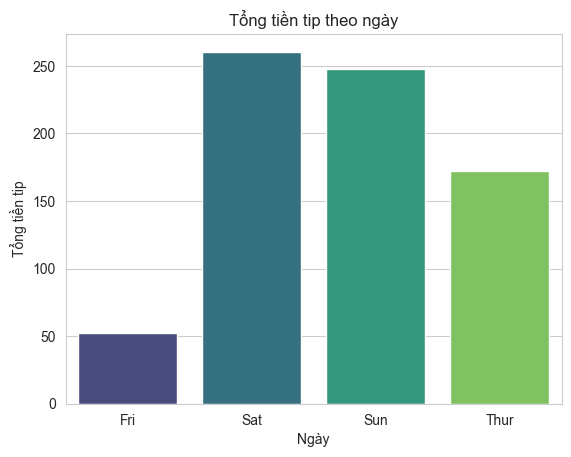

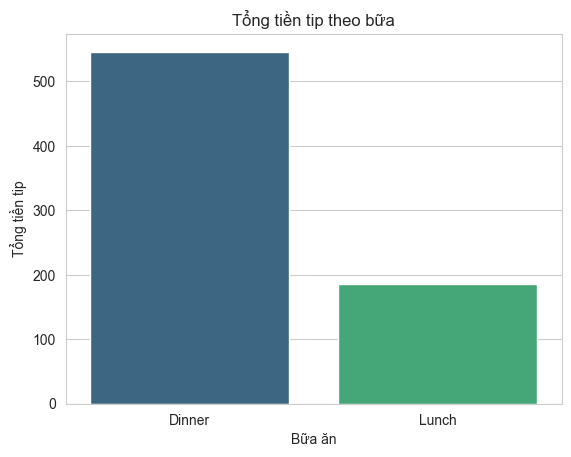

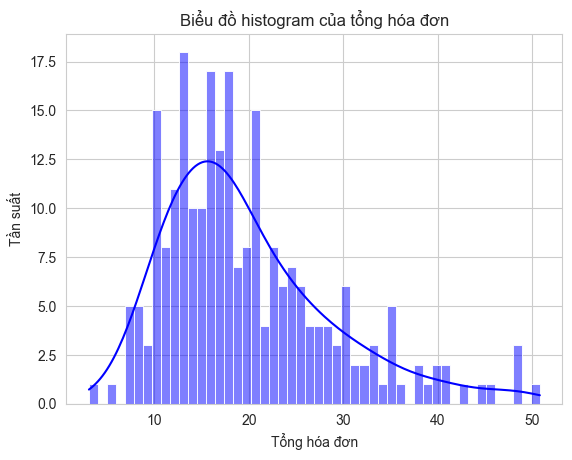

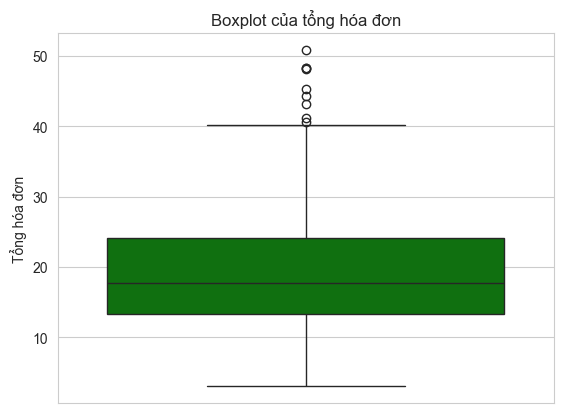

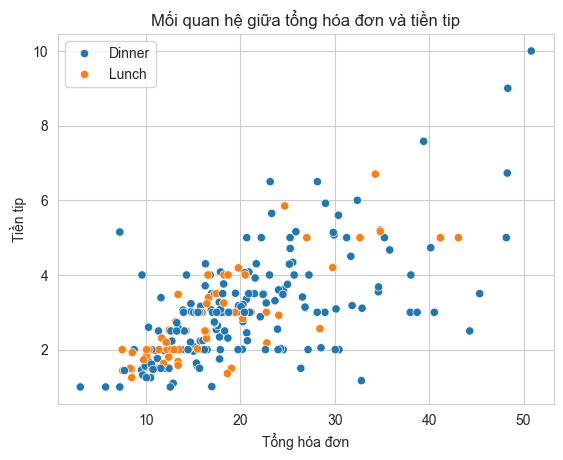

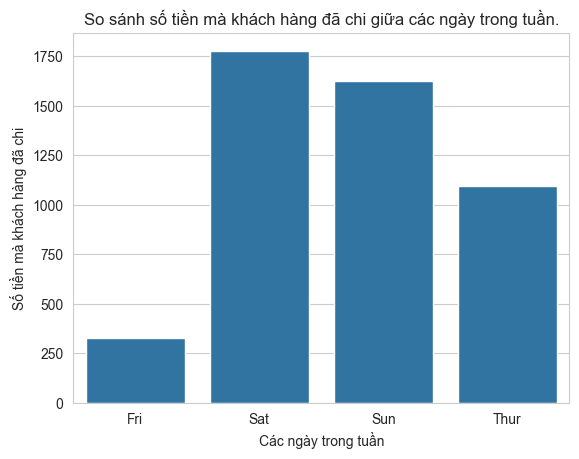

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('tips.csv')
df

# Vẽ đồ thị thể hiện tổng tiền tip theo ngày
tip_by_day = df.groupby('day', as_index=False)['tip'].sum()
sns.barplot(x='day', y='tip', data=tip_by_day, hue='day', palette='viridis')
plt.xlabel('Ngày')
plt.ylabel('Tổng tiền tip')
plt.title('Tổng tiền tip theo ngày')
plt.show()

# Vẽ đồ thị thể hiện tổng tiền tip theo bữa ăn (time)
tip_by_time = df.groupby('time', as_index=False)['tip'].sum() # thêm: as_index=False => df
sns.barplot(x='time', y='tip', data=tip_by_time, hue='time', palette='viridis')
plt.xlabel('Bữa ăn')
plt.ylabel('Tổng tiền tip')
plt.title('Tổng tiền tip theo bữa')
plt.show()

# Vẽ đồ thị histogram của tổng hoá đơn
total_bill_df = df['total_bill']
sns.histplot(total_bill_df, bins=50, kde=True, color='blue')
plt.xlabel('Tổng hóa đơn')
plt.ylabel('Tần suất')
plt.title('Biểu đồ histogram của tổng hóa đơn')
plt.show()

# Vẽ đồ thị boxplot của tổng hoá đơn
total_bill_df = df['total_bill']
sns.boxplot(total_bill_df, color='green')
plt.ylabel('Tổng hóa đơn')
plt.title('Boxplot của tổng hóa đơn')
plt.show()

# Vẽ đồ thị để kiểm tra sự liên quan giữa tổng hoá đơn và tiền tip.
sns.scatterplot(x='total_bill', y='tip', data=df, hue='time')
plt.xlabel('Tổng hóa đơn')
plt.ylabel('Tiền tip')
plt.title('Mối quan hệ giữa tổng hóa đơn và tiền tip')
plt.legend()
plt.show()

# So sánh số tiền mà khách hàng đã chi giữa các ngày trong tuần.
total_money_by_time = df.groupby('day', as_index=False)['total_bill'].sum()
sns.barplot(x='day', y='total_bill', data=total_money_by_time)
plt.xlabel('Các ngày trong tuần')
plt.ylabel('Số tiền mà khách hàng đã chi')
plt.title('So sánh số tiền mà khách hàng đã chi giữa các ngày trong tuần.')
plt.show()